In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
!pip install -U scikit-learn

In [44]:
pip install --upgrade pandas-profiling ydata-profiling

  Using cached pydantic-2.8.2-py3-none-any.whl.metadata (125 kB)
INFO: pip is looking at multiple versions of ydata-profiling to determine which version is compatible with other requirements. This could take a while.
  Using cached ydata_profiling-4.9.0-py2.py3-none-any.whl.metadata (20 kB)
INFO: pip is still looking at multiple versions of ydata-profiling to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

The conflict is caused by:
    pandas-profiling 3.0.0 depends on visions==0.7.1
    visions[type-image-path] 0.7.1 depends on visions 0.7.1 (from https://files.pythonhosted.org/packages/80/96/01e4ba22cef96

ERROR: Cannot install pandas-profiling==3.0.0, visions[type-image-path]==0.7.1, ydata-profiling==4.1.0, ydata-profiling==4.1.1, ydata-profiling==4.1.2, ydata-profiling==4.2.0, ydata-profiling==4.3.0, ydata-profiling==4.3.1, ydata-profiling==4.3.2, ydata-profiling==4.4.0, ydata-profiling==4.5.0, ydata-profiling==4.5.1, ydata-profiling==4.6.0, ydata-profiling==4.6.1, ydata-profiling==4.6.2, ydata-profiling==4.6.3, ydata-profiling==4.6.4, ydata-profiling==4.6.5, ydata-profiling==4.7.0, ydata-profiling==4.8.3 and ydata-profiling==4.9.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [3]:
df = pd.read_csv(r'E:\ML\SIH\synthetic_student_data_1000_rows.csv')
df

,Attendance_Rate,GPA,Behavioral_Incidents,Class_Size,Counselor_Visits,Parental_Education,Extracurricular_Participation,Salary_Category,Dropped_Out
0,84.967142,3.699678,1,20.000000,1,High School,0,Medium,0
1,78.617357,3.462317,1,40.000000,2,Bachelor,0,Very High,0
2,86.476885,3.029815,2,31.476400,1,Bachelor,0,Medium,0
3,95.230299,2.676532,3,26.117504,0,PhD,1,Medium,0
4,77.658466,3.349112,3,30.785640,1,High School,0,High,0
...,...,...,...,...,...,...,...,...,...
995,77.188997,3.535075,1,24.372064,1,Bachelor,0,Low,0
996,97.976865,2.986739,1,24.518898,1,Master,0,Low,0
997,86.408429,2.559063,2,29.660643,2,PhD,0,Medium,0
998,74.288210,2.918467,0,32.158158,1,High School,0,Medium,0


In [4]:
df = df.drop(columns=['Class_Size'])
df

,Attendance_Rate,GPA,Behavioral_Incidents,Counselor_Visits,Parental_Education,Extracurricular_Participation,Salary_Category,Dropped_Out
0,84.967142,3.699678,1,1,High School,0,Medium,0
1,78.617357,3.462317,1,2,Bachelor,0,Very High,0
2,86.476885,3.029815,2,1,Bachelor,0,Medium,0
3,95.230299,2.676532,3,0,PhD,1,Medium,0
4,77.658466,3.349112,3,1,High School,0,High,0
...,...,...,...,...,...,...,...,...
995,77.188997,3.535075,1,1,Bachelor,0,Low,0
996,97.976865,2.986739,1,1,Master,0,Low,0
997,86.408429,2.559063,2,2,PhD,0,Medium,0
998,74.288210,2.918467,0,1,High School,0,Medium,0


In [5]:
df.isnull().sum()

Attendance_Rate                  0
GPA                              0
Behavioral_Incidents             0
Counselor_Visits                 0
Parental_Education               0
Extracurricular_Participation    0
Salary_Category                  0
Dropped_Out                      0
dtype: int64

In [6]:
df.describe()

,Attendance_Rate,GPA,Behavioral_Incidents,Counselor_Visits,Extracurricular_Participation,Dropped_Out
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,80.151115,3.030769,1.990000,0.951000,0.402000,0.167000
std,9.426768,0.488189,1.362996,0.905217,0.490547,0.373162
min,60.000000,1.529806,0.000000,0.000000,0.000000,0.000000
25%,73.524097,2.696879,1.000000,0.000000,0.000000,0.000000
50%,80.253006,3.031539,2.000000,1.000000,0.000000,0.000000
75%,86.479439,3.364441,3.000000,1.000000,1.000000,0.000000
max,100.000000,4.000000,7.000000,5.000000,1.000000,1.000000


In [7]:
df['Salary_Category'].unique()

array(['Medium', 'Very High', 'High', 'Low'], dtype=object)

In [8]:
df['Parental_Education'].unique()

array(['High School', 'Bachelor', 'PhD', 'Master'], dtype=object)

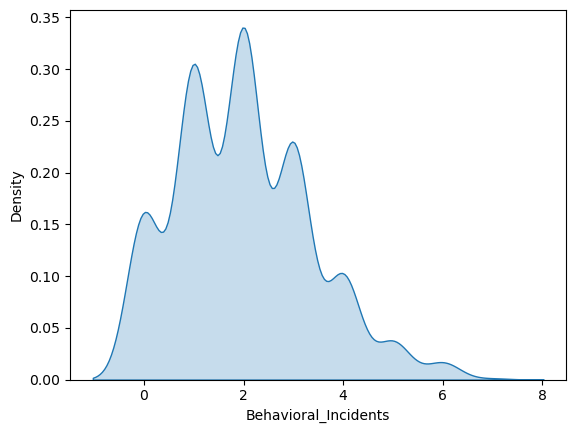

In [9]:
sns.kdeplot(df['Behavioral_Incidents'], fill=True)
plt.show()

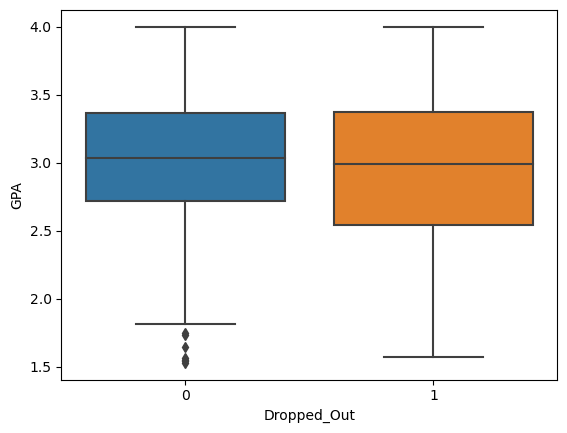

In [10]:
sns.boxplot(data = df, x = 'Dropped_Out', y = 'GPA')
plt.show()

In [11]:
x = df.drop(columns = ['Dropped_Out'])
y = df['Dropped_Out']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [13]:
!pip install -q xgboost

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import graphviz.backend as be
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [13]:
x_train.head(5)

,Attendance_Rate,GPA,Behavioral_Incidents,Counselor_Visits,Parental_Education,Extracurricular_Participation,Salary_Category
29,77.083063,2.488604,2,1,Master,1,Medium
535,80.473987,2.202648,0,0,High School,1,Low
695,76.904536,3.969464,2,0,PhD,0,Low
557,75.674418,2.598411,0,0,Bachelor,0,Low
836,95.505005,2.428137,0,1,Bachelor,1,High


In [14]:
df['Behavioral_Incidents'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7], dtype=int64)

In [15]:
cat = [['High School', 'Bachelor', 'Master', 'PhD'], ['Low', 'Medium', 'High', 'Very High']]
trf1 = ColumnTransformer([
    ('ordinal', OrdinalEncoder(categories=cat), [4, 6])
], remainder = 'passthrough')

In [16]:
x1 = pd.DataFrame(trf1.fit_transform(x_train)).head(5)
x1

,0,1,2,3,4,5,6
0,2.0,1.0,77.083063,2.488604,2.0,1.0,1.0
1,0.0,0.0,80.473987,2.202648,0.0,0.0,1.0
2,3.0,0.0,76.904536,3.969464,2.0,0.0,0.0
3,1.0,0.0,75.674418,2.598411,0.0,0.0,0.0
4,1.0,2.0,95.505005,2.428137,0.0,1.0,1.0


In [17]:
from sklearn.preprocessing import PowerTransformer
trf2 = ColumnTransformer([
    ('transformation', PowerTransformer(), slice(0, 7))
], remainder='passthrough')

In [18]:
pd.DataFrame(trf2.fit_transform(x1)).head(5)

,0,1,2,3,4,5,6
0,0.656598,0.996283,-0.584166,-0.124583,1.224745,1.224745,0.816497
1,-1.530236,-0.808779,0.233667,-1.420085,-0.816497,-0.816497,0.816497
2,1.438047,-0.808779,-0.584166,1.675519,1.224745,-0.816497,-1.224745
3,-0.282205,-0.808779,-0.993083,0.210179,-0.816497,-0.816497,-1.224745
4,-0.282205,1.430053,1.810916,-0.341030,-0.816497,1.224745,0.816497


In [19]:
from sklearn.tree import DecisionTreeClassifier
trf3 = DecisionTreeClassifier(max_depth=5)

In [20]:
trf4 = XGBClassifier()

In [21]:
trf5 = RandomForestClassifier()

In [22]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf5', trf5)
])

In [23]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'PhD'],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High',
                                                                              'Very '
                                                                              'High']]),
                                                  [4, 6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transformation',
                                                  PowerTransformer(),
                                                  slice(0, 7, None))])),
                ('trf5', RandomForestClassifier())])

In [24]:
from sklearn.metrics import accuracy_score

y_pred = pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.99

In [28]:
x.columns

Index(['Attendance_Rate', 'GPA', 'Behavioral_Incidents', 'Counselor_Visits',
       'Parental_Education', 'Extracurricular_Participation',
       'Salary_Category'],
      dtype='object')

In [41]:
x_train.columns

Index(['Attendance_Rate', 'GPA', 'Behavioral_Incidents', 'Counselor_Visits',
       'Parental_Education', 'Extracurricular_Participation',
       'Salary_Category'],
      dtype='object')

In [25]:
df2 = pd.DataFrame([[10.0, 3.7, 0, 3, 'High School', 1, 'High']], columns = x_train.columns)
c = pipe.predict(df2)
c

array([1], dtype=int64)

In [26]:
x = np.array([10, 3.7, 0, 3, 'High School', 1, 'High'], dtype='object').reshape(1, 7)
pipe.predict(x)

C:\Users\adwai\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names


array([1], dtype=int64)

C:\Users\adwai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


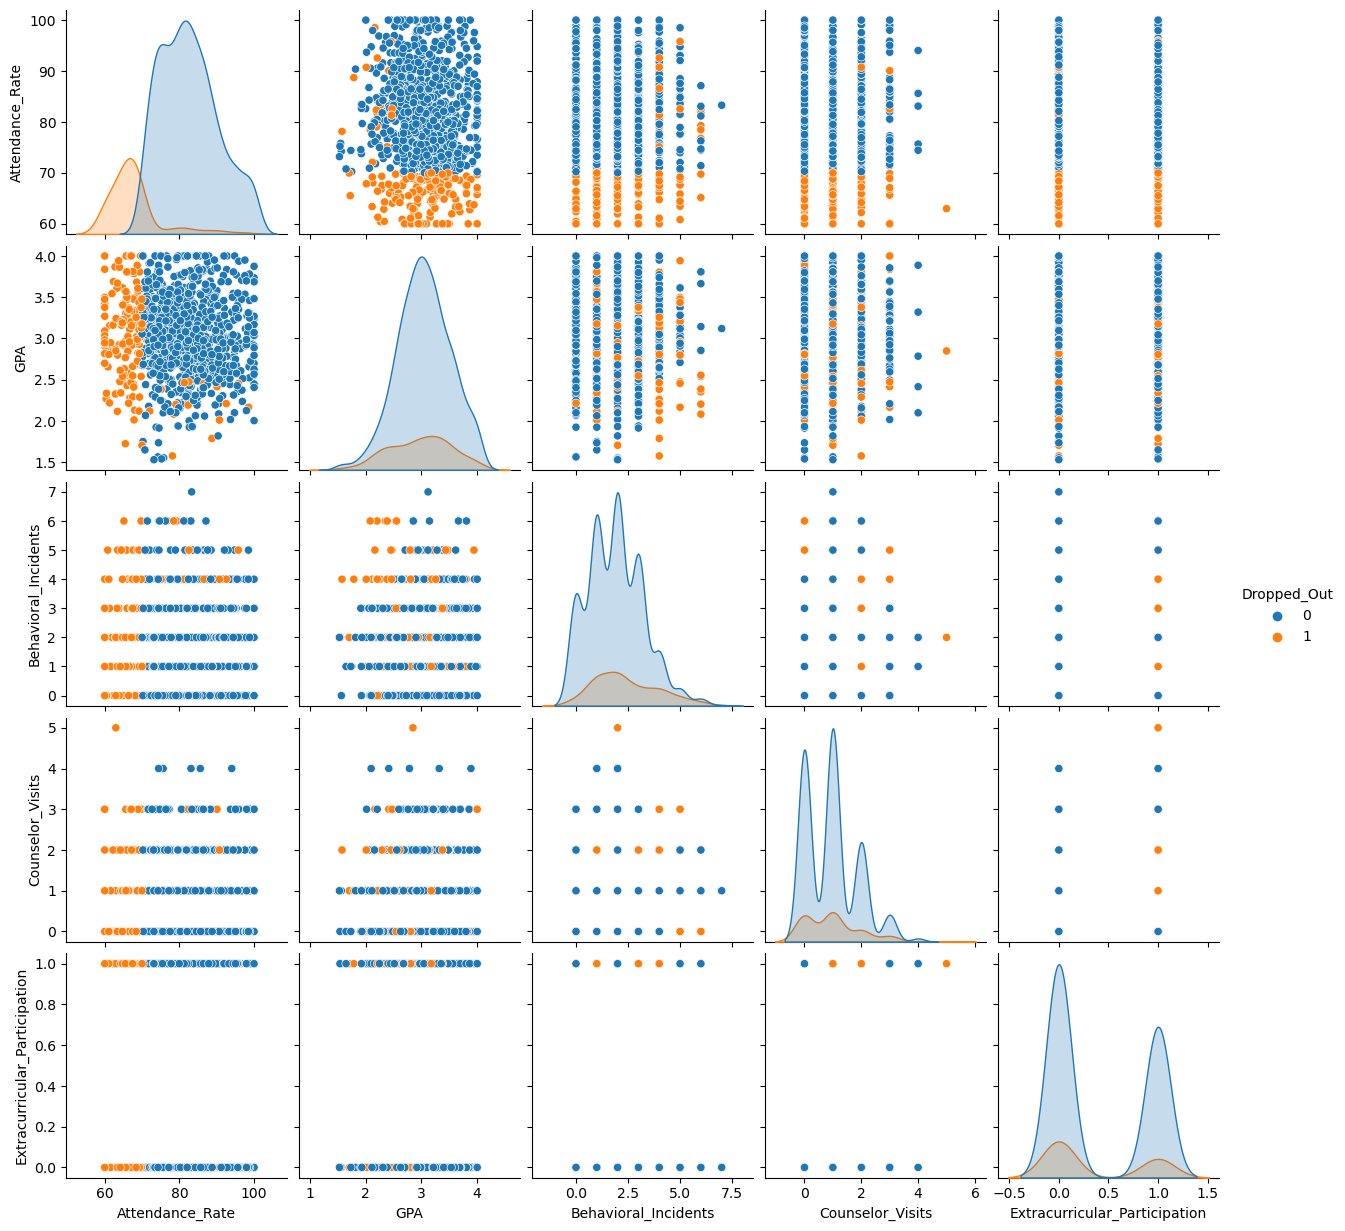

In [31]:
sns.pairplot(data = df, hue = 'Dropped_Out')

In [28]:
import pickle
f = 'pipeline2.pkl'
pickle.dump(pipe, open(f, 'wb'))

In [30]:
loaded_pipe = pickle.load(open('pipeline2.pkl', 'rb'))

In [31]:
loaded_pipe.predict(df2)

array([1], dtype=int64)